# KNN CrossValidation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(500, 4)
y = np.random.choice([0, 1], size=500)  # 500 samples, 4 features, binary class

# Split into training + cross-validation and testing sets
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training set into training and cross-validation sets
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train_cv, y_train_cv, test_size=0.3, random_state=42)

# Train and validate KNN for odd k values between 1 and 29
for i in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=i)

    #fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    #predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
    
    #evaluate cv accuracy
    acc = accuracy_score(y_cv, pred) * 100
    print(f'CV Accuracy for k={i} is {acc:.2f}%')

# Test the model on the test set using k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_tr, y_tr)
pred_test = knn.predict(X_test)
test_acc = accuracy_score(y_test, pred_test) * 100
print(f'\nTest Accuracy for k=1 is {test_acc:.2f}%')

CV Accuracy for k=1 is 45.71%
CV Accuracy for k=3 is 54.29%
CV Accuracy for k=5 is 45.71%
CV Accuracy for k=7 is 45.71%
CV Accuracy for k=9 is 47.62%
CV Accuracy for k=11 is 47.62%
CV Accuracy for k=13 is 43.81%
CV Accuracy for k=15 is 48.57%
CV Accuracy for k=17 is 45.71%
CV Accuracy for k=19 is 46.67%
CV Accuracy for k=21 is 45.71%
CV Accuracy for k=23 is 48.57%
CV Accuracy for k=25 is 45.71%
CV Accuracy for k=27 is 43.81%
CV Accuracy for k=29 is 37.14%

Test Accuracy for k=1 is 52.67%


# 10-fold Cross-Validation

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(500, 4)
y = np.random.choice([0, 1], size=500)  # 500 samples, 4 features, binary class

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform 10-fold Cross-Validation for KNN with different k values
for i in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Perform cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    mean_score = scores.mean() * 100
    print(f'10-Fold CV Accuracy for k={i} is {mean_score:.2f}%')

# Test the model on the test set using k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred_test = knn.predict(X_test)
test_acc = accuracy_score(y_test, pred_test) * 100
print(f'\nTest Accuracy for k=1 is {test_acc:.2f}%')

10-Fold CV Accuracy for k=1 is 50.00%
10-Fold CV Accuracy for k=3 is 47.71%
10-Fold CV Accuracy for k=5 is 50.00%
10-Fold CV Accuracy for k=7 is 46.86%
10-Fold CV Accuracy for k=9 is 51.71%
10-Fold CV Accuracy for k=11 is 52.00%
10-Fold CV Accuracy for k=13 is 52.00%
10-Fold CV Accuracy for k=15 is 50.00%
10-Fold CV Accuracy for k=17 is 50.57%
10-Fold CV Accuracy for k=19 is 53.43%
10-Fold CV Accuracy for k=21 is 51.14%
10-Fold CV Accuracy for k=23 is 51.14%
10-Fold CV Accuracy for k=25 is 51.71%
10-Fold CV Accuracy for k=27 is 51.71%
10-Fold CV Accuracy for k=29 is 50.86%

Test Accuracy for k=1 is 51.33%


# For MSE Error


The optimal number of neighbors is 19.


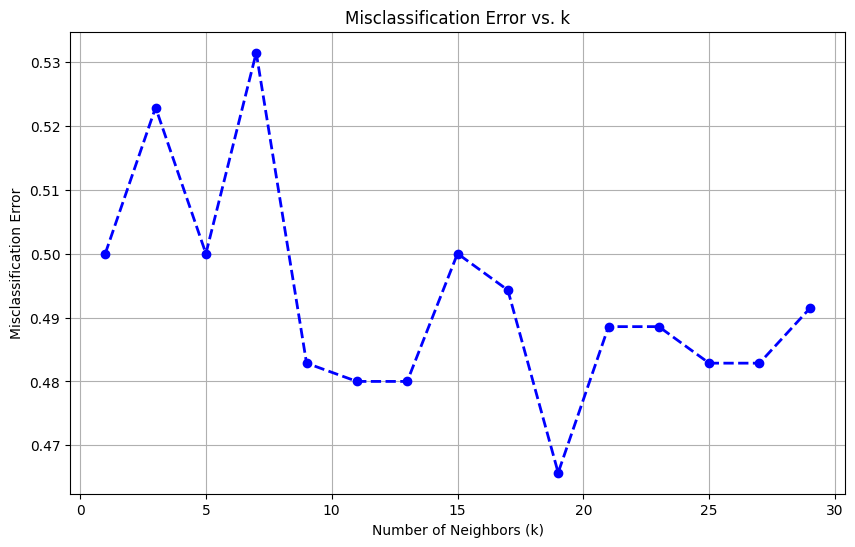


Test accuracy with k=19: 46.67%


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(500, 4)
y = np.random.choice([0, 1], size=500)  # 500 samples, 4 features, binary class

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize variables
neighbors = list(range(1, 30, 2))  # Odd values for k from 1 to 29
cv_scores = []  # Store CV scores

# Perform 10-Fold CV for each k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Convert accuracy scores to misclassification error
MSE = [1 - x for x in cv_scores]

# Determine the optimal k (minimum error)
optimal_k = neighbors[MSE.index(min(MSE))]
print(f'\nThe optimal number of neighbors is {optimal_k}.')

# Plot misclassification error vs. k
plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.title('Misclassification Error vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Error')
plt.grid()
plt.show()

# Test the model using the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_test_pred = knn_optimal.predict(X_test)
test_acc = (y_test_pred == y_test).mean() * 100
print(f'\nTest accuracy with k={optimal_k}: {test_acc:.2f}%')